# Hand Position

In [205]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


### Loading the data

In [165]:
spontan1 = pd.read_csv('Training/spontan/Evyatar636771052727603804Spontan.csv')
spontan2 = pd.read_csv('Training/spontan/Nofar636759795182793299Spontan.csv')
spontan3 = pd.read_csv('Training/spontan/Oriya636759804404113837Spontan.csv')
spontan4 = pd.read_csv('Training/spontan/OryaB636771083605535985Spontan.csv')
spontan5 = pd.read_csv('Training/spontan/Revital636770957038873193Spontan.csv')
spontan6 = pd.read_csv('Training/spontan/Sachar636771045591258071Spontan.csv')
spontan7 = pd.read_csv('Training/spontan/Shelly636759787508979097Spontan.csv')
spontan8 = pd.read_csv('Training/spontan/Yael636771059544754823Spontan.csv')
spontan9 = pd.read_csv('Training/spontan/Yoel636760921663075813Spontan.csv')


In [164]:
sync1 = pd.read_csv('Training/synchron/Evyatar636771053639929594Sync.csv')
sync2 = pd.read_csv('Training/synchron/Nofar636759797397919664Sync.csv')
sync3 = pd.read_csv('Training/synchron/Oriya636759806131350399Sync.csv')
sync4 = pd.read_csv('Training/synchron/OryaB636771084494502229Sync.csv')
sync5 = pd.read_csv('Training/synchron/Revital636770957894370062Sync.csv')
sync6 = pd.read_csv('Training/synchron/Sachar636771046527112972Sync.csv')
sync7 = pd.read_csv('Training/synchron/Shelly636759789526313406Sync.csv')
sync8 = pd.read_csv('Training/synchron/Yael636771060699529085Sync.csv')
sync9 = pd.read_csv('Training/synchron/Yoel636760923490742912Sync.csv')


In [148]:
alone1 = pd.read_csv('Training/alone/Evyatar636771054555711409Alone.csv')
alone2 = pd.read_csv('Training/alone/Nofar636759796290435160Alone.csv')
alone3 = pd.read_csv('Training/alone/Oriya636759805268396661Alone.csv')
alone4 = pd.read_csv('Training/alone/OryaB636771082736601528Alone.csv')
alone5 = pd.read_csv('Training/alone/Revital636770955999435879Alone.csv')
alone6 = pd.read_csv('Training/alone/Sachar636771047408504303Alone.csv')
alone7 = pd.read_csv('Training/alone/Shelly636759788383205274Alone.csv')
alone8 = pd.read_csv('Training/alone/Yael636771061659067649Alone.csv')
alone9 = pd.read_csv('Training/alone/Yoel636760922573364655Alone.csv')

In [167]:
HandRight = pd.read_csv('HandRight.csv')
HandRight.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


### setting the data

In [169]:
def setData(df):
    
    #combine left & right frames to one row:
    right = df[df[' Hand Type'] == 'right'].drop(' Hand Type', axis=1).drop(' # hands',axis=1 ).drop(' Frame ID', axis=1)
    left =  df[df[' Hand Type'] == 'left'].drop(' Hand Type', axis=1).drop(' # hands',axis=1 ).drop(' Frame ID', axis=1)
    right.reset_index(inplace=True)
    left.reset_index(inplace=True)
    right.columns += '_r'
    left.columns += '_l'
    new = pd.concat([right,left], axis=1)
    new2 =pd.concat([new[::10],new[1::10],new[2::10]], axis=0)
    return helper(new2)

In [170]:
alone1_new = setDataAlone(alone1)

In [171]:
def setDataAlone(df):
    
    #combine left & right frames to one row:
    right = HandRight.drop(' Hand Type', axis=1).drop(' # hands',axis=1 ).drop(' Frame ID', axis=1)
    left =  df.drop(' Hand Type', axis=1).drop(' # hands',axis=1 ).drop(' Frame ID', axis=1)
    right.reset_index(inplace=True)
    left.reset_index(inplace=True)
    right.columns += '_r'
    left.columns += '_l'
    new = pd.concat([right,left], axis=1)
    new2 =pd.concat([new[::10],new[1::10],new[2::10]], axis=0)
    return helper(new2)

In [172]:
#split the data to 3 for combine 3 frames represent half a second:

def helper (df):
    temp1 = df[::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp2 = df[1::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp3 = df[2::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp1.reset_index(inplace=True)
    temp2.reset_index(inplace=True)
    temp3.reset_index(inplace=True)
    temp1.columns += "_1"
    temp2.columns += "_2"
    temp3.columns += "_3"
    new = pd.concat([temp1 ,temp2, temp3], axis=1).drop('index_1', axis=1).drop('index_2', axis=1).drop('index_3', axis=1).drop('index_r_1', axis=1).drop('index_r_2', axis=1).drop('index_r_3', axis=1).drop('index_l_1', axis=1).drop('index_l_2', axis=1).drop('index_l_3', axis=1)
    return new

In [173]:
spontan1_new = setData(spontan1)
spontan2_new = setData(spontan2)
spontan3_new = setData(spontan3)
spontan4_new = setData(spontan4)
spontan5_new = setData(spontan5)
spontan6_new = setData(spontan6)
spontan7_new = setData(spontan7)
spontan8_new = setData(spontan8)
spontan9_new = setData(spontan9)
spontan1_new

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,128.6357,224.0294,-12.29588,-18.26243,-140.54450,-117.577900,1.586300,-0.847425,-1.588251,177.5125,...,1.324039,-165.0396,186.43010,-18.415740,-288.4788,-30.026630,26.061740,0.000000,0.005225,0.000000
1,164.2158,187.2864,-30.50245,-59.36086,-147.21790,38.278380,0.309112,-0.093646,-0.150328,186.8537,...,1.221073,-154.0480,113.13810,43.783750,-374.6709,-1.791034,90.662040,0.000000,1.069921,0.000000
2,140.2422,172.7196,-83.05754,15.96242,313.52550,94.472130,0.553037,-0.295895,-0.474993,174.3975,...,0.884271,-119.4295,155.45360,-22.194110,-292.4376,-13.069050,51.957900,0.000000,0.000000,0.000000
3,167.3251,250.5643,-21.58675,62.35201,22.16977,60.823170,1.066574,-0.601240,-1.037353,216.6980,...,1.363717,-183.6383,193.10920,40.925670,-385.9857,51.602700,-12.569050,0.000000,1.126874,0.000000
4,169.9125,200.0088,-44.34068,-81.76677,274.95720,-25.743860,0.366808,-2.014103,-0.345188,195.6541,...,0.958527,-104.3383,115.02310,-6.945995,-307.9355,-17.949860,60.355060,0.000000,0.284621,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,122.6834,306.5341,-41.47635,47.90210,508.53750,58.921860,0.935821,-0.580744,-0.782863,164.1447,...,1.450034,-145.4945,90.98325,55.297280,-362.7469,-18.927880,90.092350,0.000000,0.117480,0.000000
449,127.7196,205.6805,-28.82113,-60.68229,-284.75700,-3.183362,0.187868,-0.345170,-0.203957,155.0228,...,1.174199,-152.1578,153.36140,33.538330,-390.6072,99.927060,7.192961,0.896132,1.903579,1.000000
450,138.3531,339.6367,-15.39577,59.47570,181.51530,70.514950,0.910747,-0.515148,-0.355658,165.2662,...,1.311606,-168.0458,153.40230,15.624570,-305.6251,-49.775950,29.695370,0.000000,1.033350,0.000000
451,136.1530,223.3871,-33.01790,-107.65400,-88.08487,-66.518630,0.787340,-0.652436,-0.482716,167.1406,...,1.424348,-164.7706,116.00480,44.298840,-300.1183,-88.631150,29.718390,0.000000,0.706513,0.066154


In [174]:
sync1_new = setData(sync1)
sync2_new = setData(sync2)
sync3_new = setData(sync3)
sync4_new = setData(sync4)
sync5_new = setData(sync5)
sync6_new = setData(sync6)
sync7_new = setData(sync7)
sync8_new = setData(sync8)
sync9_new = setData(sync9)

sync1_new

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,69.65445,209.9525,-18.547970,-65.04708,338.26310,-102.57630,0.865190,-1.009409,-0.763543,112.1363,...,1.459763,-157.3456,239.8427,-21.662850,-305.2658,41.25461,-15.356370,0.0,0.000000,0.0
1,99.75249,286.2996,-12.007190,204.34640,-257.70030,165.23680,1.255895,-1.153901,-0.952242,134.0868,...,1.017560,-155.9984,118.0704,69.887830,-346.0325,-25.60244,137.729800,0.0,0.000000,0.0
2,126.50220,163.6870,57.989950,-127.42280,11.79882,-232.26320,0.593952,-1.243023,-0.439279,160.0646,...,1.536583,-101.6678,139.3295,-38.082850,-253.8314,-34.69980,50.860250,0.0,0.000000,0.0
3,75.31918,253.6640,-7.341917,-18.88154,72.13791,96.69529,1.629686,-1.277038,-1.759311,104.4457,...,2.777683,-141.4272,227.2362,-7.612950,-295.3458,37.13345,-46.611270,0.0,0.208565,0.0
4,85.62576,251.1198,49.693990,11.57467,-18.28584,24.17463,2.343032,-1.364482,-2.499056,125.2709,...,2.777389,-135.9371,116.9720,-2.172028,-301.2656,-63.13335,-43.658250,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,118.14870,210.8634,153.277800,-66.16199,-100.04850,127.51140,1.956078,-1.218917,-2.383795,148.9050,...,2.074002,-132.0570,154.5669,71.744040,-305.6773,-16.60806,6.903108,0.0,0.000000,0.0
449,128.30720,217.6384,102.614400,-13.83985,-55.46097,-210.75640,1.163967,-1.396786,-0.721135,158.2153,...,0.886262,-126.9601,131.8572,54.233300,-349.3086,21.44941,9.283110,0.0,0.087991,0.0
450,121.54640,198.3387,63.578330,148.63640,157.17250,191.92270,0.693786,-1.763640,-0.574998,158.1075,...,1.504783,-143.0086,175.7696,72.895940,-346.0262,27.09764,54.736660,0.0,0.014903,0.0
451,114.55990,205.2793,156.739200,-58.78378,-44.24956,-94.46384,1.937684,-1.241404,-2.299070,149.4497,...,1.672499,-154.3850,101.3325,93.109450,-320.4811,-88.56555,92.866440,0.0,0.140191,0.0


In [175]:
alone1_new = setDataAlone(alone1)
alone2_new = setDataAlone(alone2)
alone3_new = setDataAlone(alone3)
alone4_new = setDataAlone(alone4)
alone5_new = setDataAlone(alone5)
alone6_new = setDataAlone(alone6)
alone7_new = setDataAlone(alone7)
alone8_new = setDataAlone(alone8)
alone9_new = setDataAlone(alone9)

alone2_new

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,15.671670,226.2064,20.264700,34.266650,-195.214700,-35.043020,0.270987,-0.017635,-0.277800,46.88831,...,1.708706,-114.7217,157.2358,10.288390,-363.5210,93.437420,-28.11721,0.000000,0.00000,0.0
1,16.559210,219.3736,23.805190,7.285506,-43.118800,40.065810,0.243457,-0.037891,-0.305745,49.87231,...,1.752083,-133.2211,193.6300,1.742237,-319.4562,24.789690,-63.49397,0.178255,1.45699,0.0
2,8.263839,233.6714,-39.124070,-4.535819,17.826620,57.924550,0.175666,-0.001894,-0.239893,36.99091,...,1.670035,-115.1392,159.7027,6.089363,-338.9047,39.370930,-45.58204,0.000000,0.00000,0.0
3,26.177090,215.7688,37.388350,-28.718520,315.057800,-138.999500,0.087935,0.048247,-0.265700,57.65903,...,1.653239,-127.9454,179.0031,9.187510,-301.4791,3.216972,-68.84837,1.000000,2.72293,0.0
4,13.720490,276.7623,16.289790,78.286470,-552.162200,4.735915,0.343336,0.033722,-0.263026,43.60761,...,1.717963,-107.3126,149.6421,3.251400,-346.7874,59.439640,-33.78143,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0.815705,209.6899,-10.792580,-115.595400,-4.467873,89.773750,0.473223,0.579208,-0.023089,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,-18.922190,149.0452,-0.983002,-196.860900,-1360.551000,104.449100,-0.150978,-0.058372,-0.089673,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,-19.837060,266.2280,8.367677,35.815910,-1402.998000,-212.016200,0.322127,0.016442,-0.132688,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,37.485670,328.1625,38.908720,553.217300,-200.523900,179.997200,0.729167,-1.716032,0.412734,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### adding a label column:

In [176]:
spontan1_new['label'] = 1
spontan2_new['label'] = 1
spontan3_new['label'] = 1
spontan4_new['label'] = 1
spontan5_new['label'] = 1
spontan6_new['label'] = 1
spontan7_new['label'] = 1
spontan8_new['label'] = 1
spontan9_new['label'] = 1

In [177]:
sync1_new['label'] = 2
sync2_new['label'] = 2
sync3_new['label'] = 2
sync4_new['label'] = 2
sync5_new['label'] = 2
sync6_new['label'] = 2
sync7_new['label'] = 2
sync8_new['label'] = 2
sync9_new['label'] = 2

In [178]:
alone1_new['label'] = 3
alone2_new['label'] = 3
alone3_new['label'] = 3
alone4_new['label'] = 3
alone5_new['label'] = 3
alone6_new['label'] = 3
alone7_new['label'] = 3
alone8_new['label'] = 3
alone9_new['label'] = 3

### combine all the data-frames to big data

In [179]:
hands_arr = [alone1_new, alone2_new, alone3_new, alone4_new, alone5_new, alone6_new, alone7_new, alone8_new, alone9_new,
       sync1_new, sync2_new, sync3_new, sync4_new, sync5_new, sync6_new, sync7_new, sync8_new, sync9_new,
       spontan1_new, spontan2_new, spontan3_new, spontan4_new, spontan5_new, spontan6_new, spontan7_new, spontan8_new, spontan9_new]
hands = pd.concat(hands_arr, axis=0)

from sklearn.utils import shuffle
hands = shuffle(hands)
hands.reset_index(inplace=True)
hands = hands.drop('index', axis=1)
hands

,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,Wrist Pos X_r_1,...,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3,label
0,116.384400,347.1716,5.737608,86.678920,-314.99900,-69.001100,0.087460,-0.121148,-0.475863,157.60240,...,-168.69560,202.16020,65.759080,-290.6099,5.067532,118.614400,0.000000,0.233793,0.000000,1
1,114.882800,326.4436,98.215900,54.262890,-250.76410,-31.499150,1.467463,-1.204365,-1.292237,148.03240,...,-230.69790,220.10140,54.180720,-375.5753,14.905210,29.388620,0.000000,0.000281,0.000000,2
2,8.263839,233.6714,-39.124070,-4.535819,17.82662,57.924550,0.175666,-0.001894,-0.239893,36.99091,...,-185.96560,136.25100,5.744490,-295.7206,-54.564840,123.379500,0.535831,2.064064,0.646027,3
3,-84.006850,431.6068,37.604830,27.496550,342.48380,60.640700,0.230047,0.144854,-0.162244,-60.78648,...,-147.11810,134.41360,9.194823,-324.3970,-35.395230,-56.987210,0.845935,1.966354,0.737303,3
4,91.836570,157.1168,47.282420,-81.400180,-105.86050,272.634000,1.974402,-0.991578,-2.081332,135.32540,...,-114.13210,93.72145,-14.057030,-310.7049,-48.143360,-17.434180,0.000000,0.088182,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,130.775600,194.8537,71.659190,-15.851770,-216.18510,-358.982800,0.765345,-0.327655,-0.259194,158.37630,...,-245.47700,182.80180,6.430634,-405.4574,-20.173560,6.731430,0.000000,0.384211,0.000000,1
12030,3.863587,140.3435,-21.907570,-101.231200,370.47200,430.507500,0.464518,0.045875,-0.109136,21.91607,...,-75.35062,152.23770,41.482720,-282.2321,23.310560,20.898380,0.042213,1.778948,0.969552,3
12031,2.298728,146.1303,79.872180,11.412300,-41.02750,-766.623700,0.228566,0.035049,0.012018,NaN,...,-62.55708,147.66860,15.314010,-302.9755,92.558300,-8.076225,0.000000,0.000000,0.000000,3
12032,137.096700,321.0199,12.687230,-25.312490,-561.20370,-110.571900,0.839170,-0.480274,-0.802519,182.78700,...,-151.22090,133.41330,42.417460,-366.1037,46.711590,112.219000,0.000000,0.902973,0.000000,1


In [180]:
hands.isnull().sum()

 Position X_r_1         38
 Position Y_r_1         38
 Position Z_r_1         38
 Velocity X_r_1         38
 Velocity Y_r_1         38
                      ... 
 Elbow Pos Z_l_3       583
 Grab Strenth_l_3      583
 Grab Angle_l_3        583
 Pinch Strength_l_3    583
label                    0
Length: 109, dtype: int64

In [211]:
hands = hands.dropna()

In [212]:
hands.isnull().values.any()

False

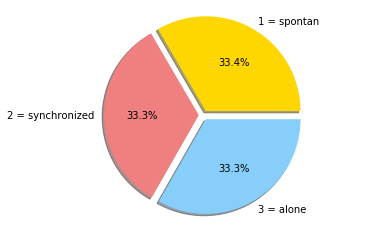

In [234]:
# lets look at the predict variable:

spontan = hands[hands['label']==1]['label'].count()
sync = hands[hands['label']==2]['label'].count()
alone = hands[hands['label']==3]['label'].count()


# Data to plot
labels = "1 = spontan", "2 = synchronized" , "3 = alone"
sizes = [spontan, sync , alone]
colors = ['gold', 'lightcoral', 'lightskyblue']
# 'lightcoral', 'lightskyblue']
explode = (0.05, 0.05, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
autopct='%1.1f%%', shadow=True)

plt.axis('equal')
plt.show()

### Split to X and y into training set and testing set


In [235]:
x= hands.drop('label',axis=1)
y = hands['label']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

In [236]:
#let check where we are standing:
rf = RandomForestClassifier(n_estimators=100)
score_rf = cross_val_score(rf, X_train, y_train, cv=5)
print ("score:  ", score_rf.mean())

score:   0.9865000522164065


In [226]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix

rf.fit(X_train, y_train )
y_pred = rf.predict(X_test)

In [229]:
conf_mat = confusion_matrix(y_test, y_pred)
print ('                        Predicted')
print ('                   Positive','Negative')
print ('Actually Positive (1): ', conf_mat[1,1], '    ', conf_mat[1,0])
print ('Actually Negative (0): ', conf_mat[0,1], '    ', conf_mat[0,0])

                        Predicted
                   Positive Negative
Actually Positive (1):  1177      27
Actually Negative (0):  11      1247


In [230]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1259
           2       0.99      0.98      0.98      1204
           3       1.00      1.00      1.00      1260

    accuracy                           0.99      3723
   macro avg       0.99      0.99      0.99      3723
weighted avg       0.99      0.99      0.99      3723



### PCA

In [215]:
pca1 = PCA(n_components=70)
pca1.fit(X_train)
pca_x_train = pca1.transform(X_train)
pca_x_test = pca1.transform(X_test)

# From array to Data Frame:
pca_x_train_df1 = pd.DataFrame(data = pca_x_train)
pca_x_test_df1 = pd.DataFrame(data = pca_x_test)

In [218]:
rf = RandomForestClassifier(n_estimators=100)
score_rf1 = cross_val_score(rf, pca_x_train_df1, y_train, cv=5)
print (score_rf1.mean())

0.9575162060238924
